<a href="https://colab.research.google.com/github/mahsanazar/chest-xray-pneumonia/blob/main/chest-xray-pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  chest-xray-pneumonia.zip
replace /content/dataset/chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/4
163/163 [==============================] - 599s 4s/step - loss: 0.4551 - accuracy: 0.7876 - val_loss: 0.5344 - val_accuracy: 0.8125
Epoch 2/4
163/163 [==============================] - 599s 4s/step - loss: 0.2815 - accuracy: 0.8804 - val_loss: 0.6845 - val_accuracy: 0.7500
Epoch 3/4
163/163 [==============================] - 597s 4s/step - loss: 0.2608 - accuracy: 0.8928 - val_loss: 0.7951 - val_accuracy: 0.6250
Epoch 4/4
163/163 [==============================] - 596s 4s/step - loss: 0.2414 - accuracy: 0.9009 - val_loss: 0.8382 - val_accuracy: 0.6875
Found 62

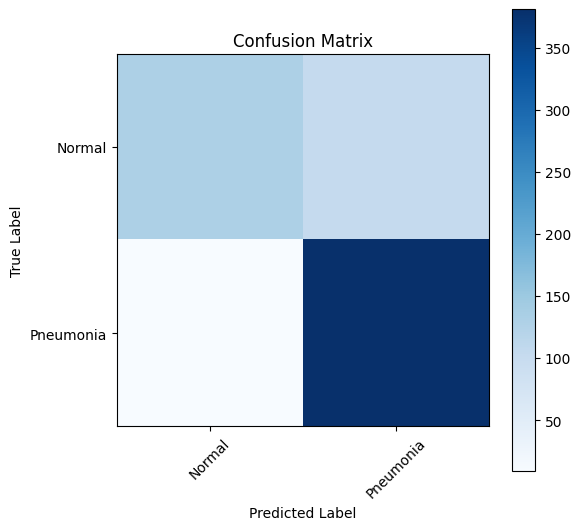

In [3]:
# Create a kaggle.json file
import json

kaggle_token = {
    "username": "mahsanazaryan",
    "key": "582fe64f8a28c20b2f0fb0c78439dfa7"
}

with open('kaggle.json', 'w') as file:
    json.dump(kaggle_token, file)

# Upload the kaggle.json file to the appropriate location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install the Kaggle API
!pip install kaggle

# Download the dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# Unzip the dataset
!unzip chest-xray-pneumonia.zip -d /content/dataset

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = "/content/dataset/chest_xray"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Define ImageDataGenerator for train and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # For binary classification
    color_mode='grayscale'  # Read images as grayscale
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # For binary classification
    color_mode='grayscale'  # Read images as grayscale
)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=4,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Evaluate the model on test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,  # Use batch size 1 to ensure predictions and ground truths align
    class_mode='binary',  # For binary classification
    color_mode='grayscale',  # Read images as grayscale
    shuffle=False  # Ensure order of predictions matches order of filenames
)

# Get predictions
predictions = model.predict(test_generator)
y_pred = np.round(predictions).flatten()
y_true = test_generator.classes

# Calculate class-wise metrics
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Normal', 'Pneumonia'], rotation=45)
plt.yticks(tick_marks, ['Normal', 'Pneumonia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
